In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

In [7]:
data=pd.read_csv(os.getcwd()+"/dataFile.csv")
data1=data.drop('class', axis=1)
data1.to_csv(r'C:\Users\LENOVO\Desktop\datastax\newData.csv', index=False)

In [4]:
data.describe()

,elevation,aspect,slope,horizontal_distance_to_hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,wilderness_area1,wilderness_area2,wilderness_area3,...,soil_type_31,soil_type_32,soil_type_33,soil_type_34,soil_type_35,soil_type_36,soil_type_37,soil_type_38,soil_type_39,soil_type_40
count,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,...,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.0000,10001.000000,10001.000000,10001.000000
mean,2960.542546,154.673033,14.121188,267.012299,46.408459,2333.747025,1969.249375,0.446355,0.050795,0.440156,...,0.042896,0.096790,0.076192,0.002100,0.003500,0.000300,0.0001,0.025897,0.022998,0.017998
std,279.650497,111.887733,7.474564,211.584881,57.930359,1536.500439,1313.107337,0.497139,0.219590,0.496431,...,0.202632,0.295687,0.265319,0.045778,0.059057,0.017318,0.0100,0.158837,0.149903,0.132951
min,1891.000000,0.000000,0.000000,0.000000,-147.000000,0.000000,30.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
25%,2806.000000,57.000000,9.000000,108.000000,7.000000,1106.000000,1026.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
50%,3000.000000,125.000000,13.000000,216.000000,29.000000,1991.000000,1695.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
75%,3162.000000,260.000000,18.000000,384.000000,70.000000,3282.000000,2539.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
max,3814.000000,359.000000,60.000000,1356.000000,463.000000,6942.000000,7110.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000


In [5]:
data.info()
#Total number of columns are 52

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   elevation                           10001 non-null  int64 
 1   aspect                              10001 non-null  int64 
 2   slope                               10001 non-null  int64 
 3   horizontal_distance_to_hydrology    10001 non-null  int64 
 4   Vertical_Distance_To_Hydrology      10001 non-null  int64 
 5   Horizontal_Distance_To_Roadways     10001 non-null  int64 
 6   Horizontal_Distance_To_Fire_Points  10001 non-null  int64 
 7   wilderness_area1                    10001 non-null  int64 
 8   wilderness_area2                    10001 non-null  int64 
 9   wilderness_area3                    10001 non-null  int64 
 10  wilderness_area4                    10001 non-null  int64 
 11  soil_type_1                         10001 non-null  in

In [6]:
data['class'].unique()
#Total number of classes is 7

array(['Douglas_fir', 'Lodgepole_Pine', 'Spruce_Fir', 'Ponderosa_Pine',
       'Krummholz', 'Cottonwood_Willow', 'Aspen'], dtype=object)

In [7]:
data.head()

,elevation,aspect,slope,horizontal_distance_to_hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,wilderness_area1,wilderness_area2,wilderness_area3,...,soil_type_32,soil_type_33,soil_type_34,soil_type_35,soil_type_36,soil_type_37,soil_type_38,soil_type_39,soil_type_40,class
0,2424,113,16,268,68,808,1260,0,0,0,...,0,0,0,0,0,0,0,0,0,Douglas_fir
1,3130,40,15,330,24,2279,1650,0,0,1,...,1,0,0,0,0,0,0,0,0,Lodgepole_Pine
2,3071,62,5,212,40,1321,2697,1,0,0,...,0,0,0,0,0,0,0,0,0,Lodgepole_Pine
3,3151,9,17,95,19,577,2029,0,1,0,...,0,0,0,0,0,0,0,0,0,Spruce_Fir
4,3139,74,3,283,9,2522,1463,1,0,0,...,0,0,0,0,0,0,0,0,0,Spruce_Fir


In [8]:
data.isna().sum()

elevation                             0
aspect                                0
slope                                 0
horizontal_distance_to_hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Horizontal_Distance_To_Fire_Points    0
wilderness_area1                      0
wilderness_area2                      0
wilderness_area3                      0
wilderness_area4                      0
soil_type_1                           0
soil_type_2                           0
soil_type_3                           0
soil_type_4                           0
soil_type_5                           0
soil_type_6                           0
soil_type_7                           0
soil_type_8                           0
soil_type_9                           0
soil_type_10                          0
soil_type_11                          0
soil_type_12                          0
soil_type_13                          0
soil_type_14                          0


<AxesSubplot:xlabel='class', ylabel='count'>

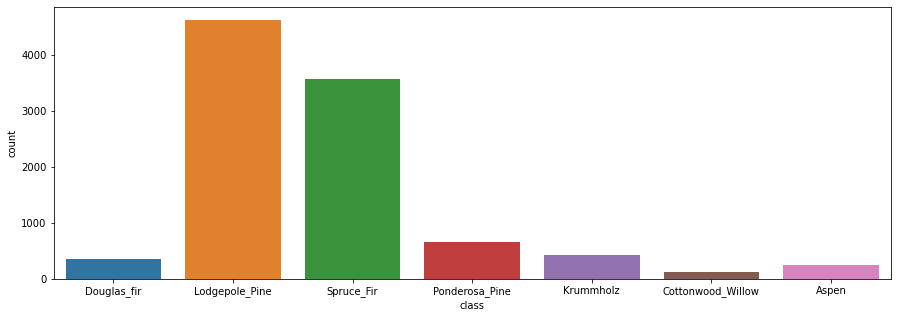

In [9]:
plt.figure(figsize=(15, 5))
sns.countplot(data['class'])

In [10]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [11]:
data['class'].value_counts()

Lodgepole_Pine       4621
Spruce_Fir           3563
Ponderosa_Pine        659
Krummholz             435
Douglas_fir           355
Aspen                 248
Cottonwood_Willow     120
Name: class, dtype: int64

We have imbalanced dataset problem. We will be solving this problem in further steps after visulaization.

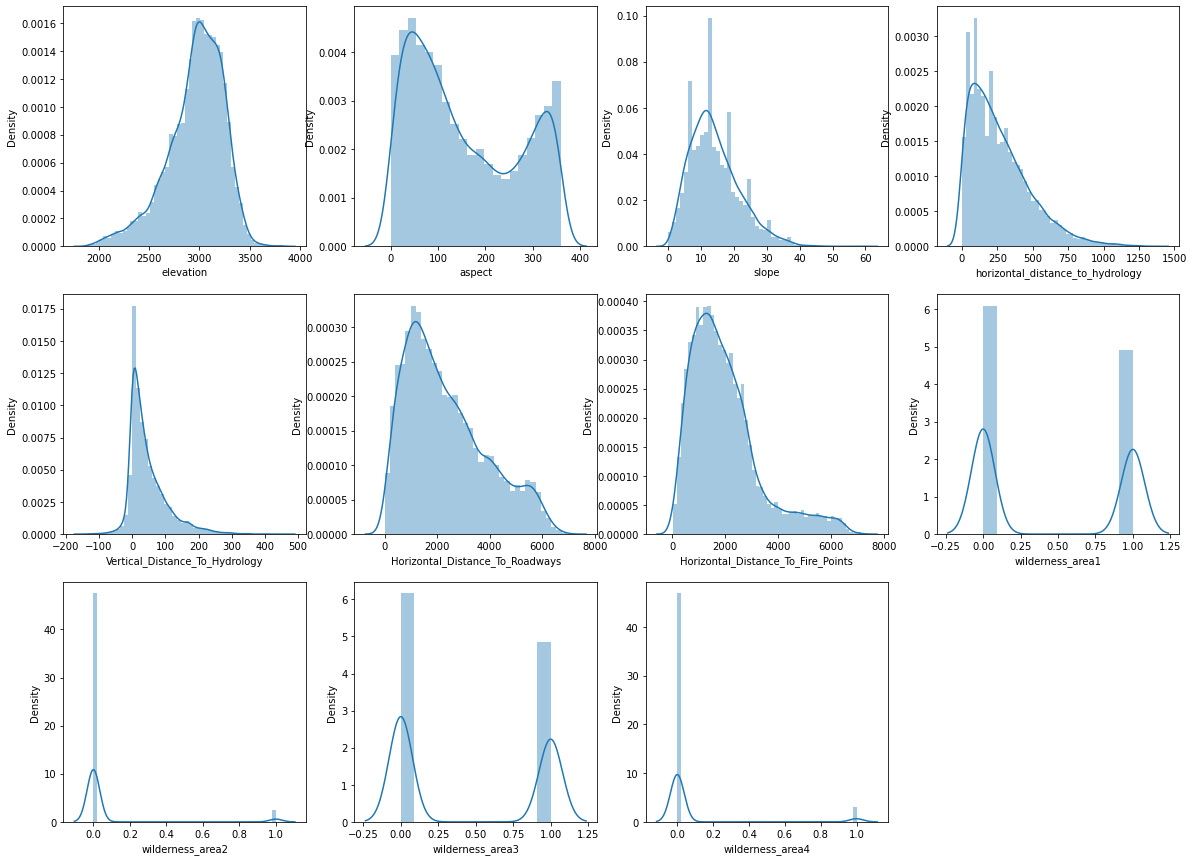

In [12]:
plt.figure(figsize=(20, 15))
j=1
for i in data.drop('class', axis=1):
    if j <=11:
        plt.subplot(3, 4, j)
        sns.distplot(data[i])
    j+=1

In [13]:
colList=[]
j=1
for i in data.drop('class', axis=1):
    if j<=11:
        colList.append(i)
        j+=1
colList

['elevation',
 'aspect',
 'slope',
 'horizontal_distance_to_hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Fire_Points',
 'wilderness_area1',
 'wilderness_area2',
 'wilderness_area3',
 'wilderness_area4']

 some insightes
1) Horizontal distance to hydrology is moderately correlated with vertical distance to hydrology 

2) Horizontal distance to roadways is correlated with widerness_area_1

3) Horizontal distance to roadways is correlated with elevation

4) widerness_area_4 is moderatly negatively correlated with elevation

5) widerness_area_1 is highly negatively correlated with widerness_area_3

Horizontal_Distance_To_Fire_Points have some outliers and it is approximatly normally distributed. So, removing the outliers using 3rd std concept

In [22]:
lowerBoundary=data['Horizontal_Distance_To_Fire_Points'].mean()-3*data['Horizontal_Distance_To_Fire_Points'].std()
upperBoundary=data['Horizontal_Distance_To_Fire_Points'].mean()+3*data['Horizontal_Distance_To_Fire_Points'].std()
lowerBoundary, upperBoundary

(-1970.07263721991, 5908.571387344898)

In [23]:
data.loc[data['Horizontal_Distance_To_Fire_Points']>=5908.57, 'Horizontal_Distance_To_Fire_Points'] = 5908.57

In [24]:
data['Horizontal_Distance_To_Fire_Points'].max()

5908.57

<AxesSubplot:xlabel='Horizontal_Distance_To_Fire_Points', ylabel='Density'>

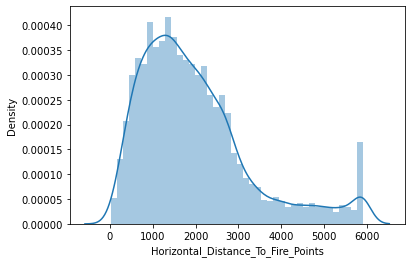

In [25]:
sns.distplot(data['Horizontal_Distance_To_Fire_Points'])

We have unbalanced dataset so removing it using SMOTE technique

In [26]:
X=data.drop('class', axis=1)
Y=data['class']

In [27]:
oversampler=SMOTE()
X, Y=oversampler.fit_resample(X, Y)

In [28]:
oversampled_df=pd.concat([X, Y], axis=1)
oversampled_df.head()

,elevation,aspect,slope,horizontal_distance_to_hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,wilderness_area1,wilderness_area2,wilderness_area3,...,soil_type_32,soil_type_33,soil_type_34,soil_type_35,soil_type_36,soil_type_37,soil_type_38,soil_type_39,soil_type_40,class
0,2424,113,16,268,68,808,1260.0,0,0,0,...,0,0,0,0,0,0,0,0,0,Douglas_fir
1,3130,40,15,330,24,2279,1650.0,0,0,1,...,1,0,0,0,0,0,0,0,0,Lodgepole_Pine
2,3071,62,5,212,40,1321,2697.0,1,0,0,...,0,0,0,0,0,0,0,0,0,Lodgepole_Pine
3,3151,9,17,95,19,577,2029.0,0,1,0,...,0,0,0,0,0,0,0,0,0,Spruce_Fir
4,3139,74,3,283,9,2522,1463.0,1,0,0,...,0,0,0,0,0,0,0,0,0,Spruce_Fir


<AxesSubplot:xlabel='class', ylabel='count'>

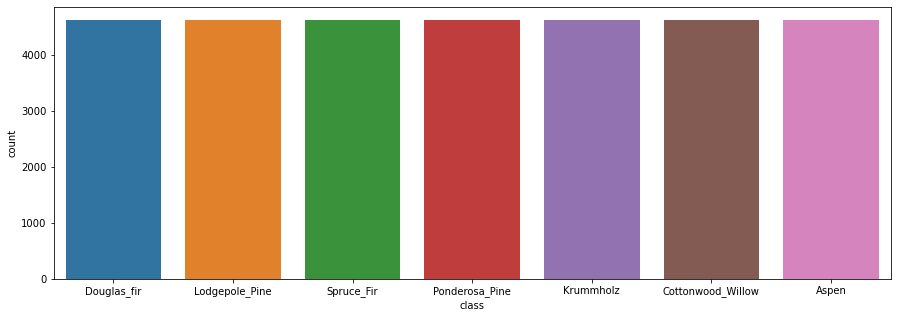

In [29]:
plt.figure(figsize=(15, 5))
sns.countplot(oversampled_df['class'])

In [30]:
# oversampled_df.describe()

### Clustring before standardization

In [31]:
WCSS=[]
for i in range(1, 20):
    kmeans=KMeans(n_clusters=i, init='k-means++', n_jobs=-1)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

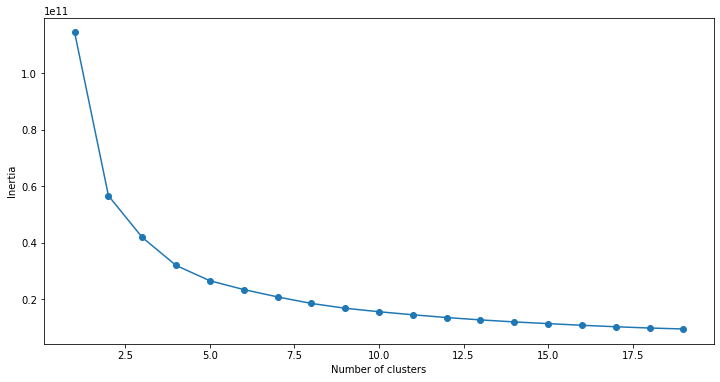

In [32]:
frame = pd.DataFrame({'Cluster':range(1,20), 'WCSS':WCSS})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['WCSS'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

### Clustring after standardization

Text(0, 0.5, 'Inertia')

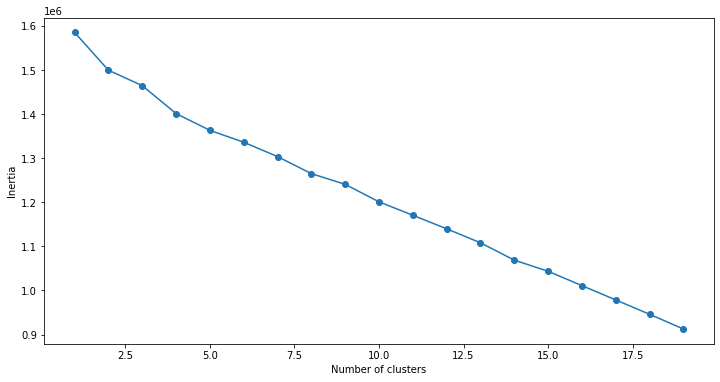

In [41]:
scaler=StandardScaler()
xScaled=scaler.fit_transform(X)
scaledFeatures=pd.DataFrame(xScaled, columns=X.columns)
scaledFeatures.head()

WCSS_=[]
for i in range(1, 20):
    kmeans_=KMeans(n_clusters=i, init='k-means++', n_jobs=-1)
    kmeans_.fit(xScaled)
    WCSS_.append(kmeans_.inertia_)

frame_ = pd.DataFrame({'Cluster':range(1,20), 'WCSS':WCSS_})
plt.figure(figsize=(12,6))
plt.plot(frame_['Cluster'], frame_['WCSS'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

#### After doing standardization the features become similar in magnitude and thats the reason K-means clustering usually does not fulfill the job in this case as we can see above

In [33]:
from kneed import KneeLocator
kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
kmeans=KMeans(n_clusters=kn.knee, init='k-means++', n_jobs=-1)
kmeans.fit(X)
pred=kmeans.predict(X)
oversampled_df['cluster']=pred
oversampled_df.head()

,elevation,aspect,slope,horizontal_distance_to_hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,wilderness_area1,wilderness_area2,wilderness_area3,...,soil_type_33,soil_type_34,soil_type_35,soil_type_36,soil_type_37,soil_type_38,soil_type_39,soil_type_40,class,cluster
0,2424,113,16,268,68,808,1260.0,0,0,0,...,0,0,0,0,0,0,0,0,Douglas_fir,4
1,3130,40,15,330,24,2279,1650.0,0,0,1,...,0,0,0,0,0,0,0,0,Lodgepole_Pine,0
2,3071,62,5,212,40,1321,2697.0,1,0,0,...,0,0,0,0,0,0,0,0,Lodgepole_Pine,2
3,3151,9,17,95,19,577,2029.0,0,1,0,...,0,0,0,0,0,0,0,0,Spruce_Fir,4
4,3139,74,3,283,9,2522,1463.0,1,0,0,...,0,0,0,0,0,0,0,0,Spruce_Fir,0


In [34]:
oversampled_df['class'].unique()

array(['Douglas_fir', 'Lodgepole_Pine', 'Spruce_Fir', 'Ponderosa_Pine',
       'Krummholz', 'Cottonwood_Willow', 'Aspen'], dtype=object)

In [36]:
oversampled_df['cluster'].unique()

array([4, 0, 2, 5, 3, 1])

In [37]:
oversampled_df['class']=oversampled_df['class'].map({'Spruce_Fir':1, 'Lodgepole_Pine':2, 'Ponderosa_Pine':3, 'Cottonwood_Willow':4, 'Aspen':5, 'Douglas_fir':6, 'Krummholz':7})

In [38]:
oversampled_df

,elevation,aspect,slope,horizontal_distance_to_hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,wilderness_area1,wilderness_area2,wilderness_area3,...,soil_type_33,soil_type_34,soil_type_35,soil_type_36,soil_type_37,soil_type_38,soil_type_39,soil_type_40,class,cluster
0,2424,113,16,268,68,808,1260.000000,0,0,0,...,0,0,0,0,0,0,0,0,6,4
1,3130,40,15,330,24,2279,1650.000000,0,0,1,...,0,0,0,0,0,0,0,0,2,0
2,3071,62,5,212,40,1321,2697.000000,1,0,0,...,0,0,0,0,0,0,0,0,2,2
3,3151,9,17,95,19,577,2029.000000,0,1,0,...,0,0,0,0,0,0,0,0,1,4
4,3139,74,3,283,9,2522,1463.000000,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32342,3335,300,23,201,71,1089,1497.868871,0,1,0,...,0,0,0,0,0,0,0,0,1,4
32343,3098,252,8,229,40,1346,1464.672203,0,0,1,...,0,0,0,0,0,0,0,0,1,4
32344,3091,130,10,0,0,2731,3484.620188,1,0,0,...,0,0,0,0,0,0,0,0,1,2
32345,3162,340,13,101,14,2737,574.537585,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [86]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [87]:
X=oversampled_df.drop(['class', 'cluster'], axis=1)
Y=oversampled_df[['class', 'cluster']]
scaledX=scaler.fit_transform(X)
scaledX_df=pd.DataFrame(scaledX, columns=X.columns)
finalDf=pd.concat([scaledX_df, Y], axis=1)

In [50]:
finalDf

,elevation,aspect,slope,horizontal_distance_to_hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,wilderness_area1,wilderness_area2,wilderness_area3,...,soil_type_33,soil_type_34,soil_type_35,soil_type_36,soil_type_37,soil_type_38,soil_type_39,soil_type_40,class,cluster
0,-1.079625,-0.449950,0.029483,0.151777,0.339112,-0.821854,-0.378957,-0.572031,-0.183526,-0.783145,...,-0.174136,-0.025488,-0.060509,-0.009631,-0.00556,-0.16087,-0.135832,-0.137008,6,4
1,0.759695,-1.146338,-0.102369,0.465760,-0.450236,0.215521,-0.040555,-0.572031,-0.183526,1.276902,...,-0.174136,-0.025488,-0.060509,-0.009631,-0.00556,-0.16087,-0.135832,-0.137008,2,0
2,0.605984,-0.936467,-1.420889,-0.131821,-0.163200,-0.460077,0.867923,1.748156,-0.183526,-0.783145,...,-0.174136,-0.025488,-0.060509,-0.009631,-0.00556,-0.16087,-0.135832,-0.137008,2,2
3,0.814405,-1.442064,0.161335,-0.724337,-0.539934,-0.984759,0.288302,-0.572031,5.448830,-0.783145,...,-0.174136,-0.025488,-0.060509,-0.009631,-0.00556,-0.16087,-0.135832,-0.137008,1,4
4,0.783142,-0.821993,-1.684593,0.227741,-0.719332,0.386889,-0.202814,1.748156,-0.183526,-0.783145,...,-0.174136,-0.025488,-0.060509,-0.009631,-0.00556,-0.16087,-0.135832,-0.137008,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32342,1.293775,1.333947,0.952447,-0.187528,0.392931,-0.623688,-0.172559,-0.572031,5.448830,-0.783145,...,-0.174136,-0.025488,-0.060509,-0.009631,-0.00556,-0.16087,-0.135832,-0.137008,1,4
32343,0.676326,0.876048,-1.025333,-0.045729,-0.163200,-0.442447,-0.201364,-0.572031,-0.183526,1.276902,...,-0.174136,-0.025488,-0.060509,-0.009631,-0.00556,-0.16087,-0.135832,-0.137008,1,4
32344,0.658089,-0.287778,-0.761629,-1.205441,-0.880789,0.534279,1.551338,1.748156,-0.183526,-0.783145,...,-0.174136,-0.025488,-0.060509,-0.009631,-0.00556,-0.16087,-0.135832,-0.137008,1,2
32345,0.843063,1.715529,-0.366073,-0.693952,-0.629633,0.538511,-0.973730,-0.572031,-0.183526,1.276902,...,-0.174136,-0.025488,-0.060509,-0.009631,-0.00556,-0.16087,-0.135832,-0.137008,1,0


In [51]:
clusterWiseData=finalDf[finalDf['cluster']==0]
clusterWiseData

,elevation,aspect,slope,horizontal_distance_to_hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,wilderness_area1,wilderness_area2,wilderness_area3,...,soil_type_33,soil_type_34,soil_type_35,soil_type_36,soil_type_37,soil_type_38,soil_type_39,soil_type_40,class,cluster
1,0.759695,-1.146338,-0.102369,0.465760,-0.450236,0.215521,-0.040555,-0.572031,-0.183526,1.276902,...,-0.174136,-0.025488,-0.060509,-0.009631,-0.00556,-0.16087,-0.135832,-0.137008,2,0
4,0.783142,-0.821993,-1.684593,0.227741,-0.719332,0.386889,-0.202814,1.748156,-0.183526,-0.783145,...,-0.174136,-0.025488,-0.060509,-0.009631,-0.00556,-0.16087,-0.135832,-0.137008,1,0
7,-0.157360,-0.593043,-0.761629,-0.724337,-0.629633,0.627368,-1.264007,-0.572031,-0.183526,1.276902,...,-0.174136,-0.025488,-0.060509,-0.009631,-0.00556,-0.16087,-0.135832,-0.137008,2,0
8,-0.042728,1.791845,0.688743,-0.901586,-0.719332,0.329061,-0.667900,-0.572031,-0.183526,1.276902,...,-0.174136,-0.025488,-0.060509,-0.009631,-0.00556,-0.16087,-0.135832,-0.137008,2,0
16,0.256878,0.513545,-1.157185,0.009978,-0.593753,0.046974,0.147735,-0.572031,-0.183526,1.276902,...,-0.174136,-0.025488,-0.060509,-0.009631,-0.00556,-0.16087,-0.135832,-0.137008,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32330,0.876932,1.696450,0.293187,2.385109,5.021380,-0.266848,-0.784063,-0.572031,-0.183526,1.276902,...,-0.174136,-0.025488,-0.060509,-0.009631,-0.00556,-0.16087,-0.135832,-0.137008,1,0
32332,0.592958,0.532624,-0.102369,-0.830687,-0.898729,0.417213,-0.305814,-0.572031,-0.183526,1.276902,...,-0.174136,-0.025488,-0.060509,-0.009631,-0.00556,-0.16087,-0.135832,-0.137008,1,0
32333,0.600773,-0.259159,-0.497925,0.116327,-0.414356,0.110444,-0.902005,1.748156,-0.183526,-0.783145,...,-0.174136,-0.025488,-0.060509,-0.009631,-0.00556,-0.16087,-0.135832,-0.137008,1,0
32338,1.426644,0.322754,-0.366073,2.319274,1.935748,1.094222,-1.158781,-0.572031,-0.183526,1.276902,...,-0.174136,-0.025488,-0.060509,-0.009631,-0.00556,-0.16087,-0.135832,-0.137008,1,0


In [63]:

xgbacc=[]
randacc=[]

numOfCluster=len(finalDf['cluster'].unique())
for i in range(numOfCluster):
    clusterWiseData=finalDf[finalDf['cluster']==i]
    features=clusterWiseData.drop(['class', 'cluster'], axis=1)
    labels=clusterWiseData['class']
    
    x_train, x_test, y_train, y_test=train_test_split(features, labels, test_size=1/3, random_state=9)
#     x_train=scaler.fit_transform(x_train)
#     x_test=scaler.fit_transform(x_test)
    
    #========================XGBoostCLF=========================================
    param_grid_xgboost = {
                'learning_rate': [0.5, 0.1, 0.01, 0.001],
                'max_depth': [3, 5, 7],
                'n_estimators': [10, 50, 100] 
    }
    
    xgboostclf=XGBClassifier()    
    xgbGrid=GridSearchCV(xgboostclf, param_grid=param_grid_xgboost, verbose=3, cv=2)
    xgbGrid.fit(x_train, y_train)
    lr=xgbGrid.best_params_['learning_rate']
    md=xgbGrid.best_params_['max_depth']
    ne=xgbGrid.best_params_['n_estimators']
    
    xgb=XGBClassifier(learning_rate=lr, max_depth=md, n_estimators=ne)
    xgb.fit(x_train, y_train)
    xgbPred=xgb.predict(x_test)
    
    if accuracy_score(y_test, xgbPred):
        xgbacc.append(accuracy_score(y_test, xgbPred))
    else:
        xgbacc.append(roc_auc_score(y_test, xgbPred))
    #===============================================================================
    
    
    #=========================RandomForestCLF=======================================
    param_grid = {"n_estimators": [10, 50, 100], "criterion": ['gini', 'entropy'],
               "max_depth": range(2, 4, 1), "max_features": ['auto', 'log2']
              }
    
    rndClf=RandomForestClassifier()
    gridForest=GridSearchCV(rndClf, param_grid=param_grid, cv=2, verbose=3)
    gridForest.fit(x_train, y_train)
    crt=gridForest.best_params_['criterion']
    mxd=gridForest.best_params_['max_depth']
    mf=gridForest.best_params_['max_features']
    nest=gridForest.best_params_['n_estimators']
    rndClf=RandomForestClassifier(criterion=crt, max_depth=mxd, max_features=mf, n_estimators=nest)
    rndClf.fit(x_train, y_train)
    randPred=rndClf.predict(x_test)
    if accuracy_score(y_test, randPred):
        randacc.append(accuracy_score(y_test, randPred))
    else:
        randacc.append(roc_auc_score(y_test, randPred))
    
    #=================================================================================
    
    
finalModels=[]
for i in range(numOfCluster):
    if xgbacc[i] >= randacc[i]:
        finalModels.append("XGBClassifier")
    else:
        finalModels.append('RandomForestClassifier')
    print('for cluster {} final model is {}'.format(i, finalModels[i]))

Fitting 2 folds for each of 36 candidates, totalling 72 fits
[11:36:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/2] END learning_rate=0.5, max_depth=3, n_estimators=10; total time=   0.0s
[11:36:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/2] END learning_rate=0.5, max_depth=3, n_estimators=10; total time=   0.0s
[11:36:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation met

In [64]:
xgbacc

[0.8981912144702843,
 0.8550335570469799,
 0.8805970149253731,
 0.8463476070528967,
 0.9178921568627451,
 0.9534639608117564]

In [65]:
randacc

[0.5167958656330749,
 0.5140939597315436,
 0.48880597014925375,
 0.49622166246851385,
 0.5428921568627451,
 0.48915325402379284]

In [89]:
gradBoostacc=[]
logRegacc=[]
KNNacc=[]
randacc=[]
xgbacc=[]

numOfCluster=len(finalDf['cluster'].unique())
for i in range(numOfCluster):
    clusterWiseData=finalDf[finalDf['cluster']==i]
    features=clusterWiseData.drop(['class', 'cluster'], axis=1)
    labels=clusterWiseData['class']
    
    x_train, x_test, y_train, y_test=train_test_split(features, labels, test_size=1/3, random_state=9)
#     x_train=scaler.fit_transform(x_train)
#     x_test=scaler.fit_transform(x_test)
    
    
    #========================XGBoostCLF=========================================
    param_grid_xgboost = {
                'learning_rate': [0.5, 0.1, 0.01, 0.001],
                'max_depth': [3, 5, 7],
                'n_estimators': [10, 50, 100] 
    }
    
    xgboostclf=XGBClassifier()    
    xgbGrid=GridSearchCV(xgboostclf, param_grid=param_grid_xgboost, verbose=3, cv=2)
    xgbGrid.fit(x_train, y_train)
    lr=xgbGrid.best_params_['learning_rate']
    md=xgbGrid.best_params_['max_depth']
    ne=xgbGrid.best_params_['n_estimators']
    
    xgb=XGBClassifier(learning_rate=lr, max_depth=md, n_estimators=ne)
    xgb.fit(x_train, y_train)
    xgbPred=xgb.predict(x_test)
    
    if accuracy_score(y_test, xgbPred):
        xgbacc.append(accuracy_score(y_test, xgbPred))
    else:
        xgbacc.append(roc_auc_score(y_test, xgbPred))
    #===============================================================================
    
    
    #=========================RandomForestCLF=======================================
    param_grid = {"n_estimators": [10, 50, 100], "criterion": ['gini', 'entropy'],
               "max_depth": range(2, 4, 1), "max_features": ['auto', 'log2']
              }
    
    rndClf=RandomForestClassifier()
    gridForest=GridSearchCV(rndClf, param_grid=param_grid, cv=2, verbose=3)
    gridForest.fit(x_train, y_train)
    crt=gridForest.best_params_['criterion']
    mxd=gridForest.best_params_['max_depth']
    mf=gridForest.best_params_['max_features']
    nest=gridForest.best_params_['n_estimators']
    rndClf=RandomForestClassifier(criterion=crt, max_depth=mxd, max_features=mf, n_estimators=nest)
    rndClf.fit(x_train, y_train)
    randPred=rndClf.predict(x_test)
    if accuracy_score(y_test, randPred):
        randacc.append(accuracy_score(y_test, randPred))
    else:
        randacc.append(roc_auc_score(y_test, randPred))
    
    #=================================================================================
    
    
    
    
    #=============================LogisticRegression==================================
    
    logReg=LogisticRegression(multi_class='multinomial', solver='lbfgs')
    params={
        'C':[0, 0.001, 0.01, 0.1]
    }
    grid=GridSearchCV(logReg, param_grid=params, cv=5, verbose=3)
    grid.fit(x_train, y_train)
    C_=grid.best_params_['C']
    logReg=LogisticRegression(multi_class='multinomial', solver='lbfgs', C=C_)
    logReg.fit(x_train, y_train)
    
    logRegPred=logReg.predict(x_test)
    
    if accuracy_score(y_test, logRegPred):
        logRegacc.append(accuracy_score(y_test, logRegPred))
    else:
        logRegacc.append(roc_auc_score(y_test, logRegPred))
    
    
    #=================================================================================
    
    #========================GradBoostCLF=========================================
    param_grid_gradBoost = {
                'learning_rate': [0.5, 0.1, 0.01],
                'max_depth': [3, 5, 7],
                'n_estimators': [50, 100], 
#                 "max_features":["log2","sqrt"],
#                 "criterion": ["friedman_mse",  "mae"],
    }
    
    gradBoostclf=GradientBoostingClassifier()    
    gradGrid=GridSearchCV(gradBoostclf, param_grid=param_grid_gradBoost, verbose=3, cv=2)
    gradGrid.fit(x_train, y_train)
    lr=gradGrid.best_params_['learning_rate']
    md=gradGrid.best_params_['max_depth']
    ne=gradGrid.best_params_['n_estimators']
#     mf=gradGrid.best_params_['max_features']
#     crt=gradGrid.best_params_['criterion']
    
    gradBoostclf=GradientBoostingClassifier(learning_rate=lr, max_depth=md, n_estimators=ne)
    gradBoostclf.fit(x_train, y_train)
    gradBoostPred=gradBoostclf.predict(x_test)
    
    if accuracy_score(y_test, gradBoostPred):
        gradBoostacc.append(accuracy_score(y_test, gradBoostPred))
    else:
        gradBoostacc.append(roc_auc_score(y_test, gradBoostPred))
    #===============================================================================
    
    #==================================KNNCLF=======================================
        knnClf=KNeighborsClassifier()
    params_knn={
        'n_neighbors':[3,4,5,6,7,8],
        'leaf_size':[1,3,5],
        'algorithm':['auto', 'kd_tree']
    }
    gridKNN=GridSearchCV(knnClf, param_grid=params_knn,cv=2, verbose=3, n_jobs=-1)
    gridKNN.fit(x_train, y_train)
    nn=gridKNN.best_params_['n_neighbors']
    ls=gridKNN.best_params_['leaf_size']
    algo=gridKNN.best_params_['algorithm']

    knnClf=KNeighborsClassifier(n_neighbors=nn, leaf_size=ls, algorithm=algo)
    knnClf.fit(x_train, y_train)
    knnClfPred=knnClf.predict(x_test)

    if accuracy_score(y_test, knnClfPred):
        KNNacc.append(accuracy_score(y_test, knnClfPred))
    else:
        KNNacc.append(roc_auc_score(y_test, knnClfPred))

    
    #=================================================================================

temp=np.stack((logRegacc, gradBoostacc, randacc, xgbacc, KNNacc), axis=1)
accDf=pd.DataFrame(temp, columns=['LogisticRegressionAcc','GradientBoostingAcc', 'RandomForestCLF', 'XGBoostCLF', 'KNNCLF'])
accDf

Fitting 2 folds for each of 36 candidates, totalling 72 fits
[13:27:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/2] END learning_rate=0.5, max_depth=3, n_estimators=10; total time=   0.0s
[13:27:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/2] END learning_rate=0.5, max_depth=3, n_estimators=10; total time=   0.0s
[13:27:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation met

,LogisticRegressionAcc,GradientBoostingAcc,RandomForestCLF,XGBoostCLF,KNNCLF
0,0.665633,0.893023,0.519897,0.898191,0.840827
1,0.671141,0.864430,0.516779,0.855034,0.812081
2,0.613184,0.877488,0.475746,0.880597,0.816542
3,0.591100,0.842989,0.516373,0.846348,0.784215
4,0.614788,0.908905,0.551879,0.917892,0.849673
5,0.618265,0.933520,0.482855,0.953464,0.880336


In [88]:
# KNNacc=[]

# numOfCluster=len(finalDf['cluster'].unique())
# for i in range(numOfCluster):
#     clusterWiseData=finalDf[finalDf['cluster']==i]
#     features=clusterWiseData.drop(['class', 'cluster'], axis=1)
#     labels=clusterWiseData['class']
    
#     x_train, x_test, y_train, y_test=train_test_split(features, labels, test_size=1/3, random_state=9)
# #     x_train=scaler.fit_transform(x_train)
# #     x_test=scaler.fit_transform(x_test)
    
    
#     knnClf=KNeighborsClassifier()
#     params_knn={
#         'n_neighbors':[3,4,5,6,7,8],
#         'leaf_size':[1,3,5],
#         'algorithm':['auto', 'kd_tree']
#     }
#     gridKNN=GridSearchCV(knnClf, param_grid=params_knn,cv=2, verbose=3, n_jobs=-1)
#     gridKNN.fit(x_train, y_train)
#     nn=gridKNN.best_params_['n_neighbors']
#     ls=gridKNN.best_params_['leaf_size']
#     algo=gridKNN.best_params_['algorithm']

#     knnClf=KNeighborsClassifier(n_neighbors=nn, leaf_size=ls, algorithm=algo)
#     knnClf.fit(x_train, y_train)
#     knnClfPred=knnClf.predict(x_test)

#     if accuracy_score(y_test, knnClfPred):
#         KNNacc.append(accuracy_score(y_test, knnClfPred))
#     else:
#         KNNacc.append(roc_auc_score(y_test, knnClfPred))

    
#     #=================================================================================
# KNNacc

In [1]:
import cassandra
print(cassandra.__version__)
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
import pandas as pd
from cassandra.query import dict_factory
# from cassandra.query import tuple_factory

cloud_config= {
        'secure_connect_bundle': 'C:\\Users\\LENOVO\\Desktop\\datastax\\secure-connect-forestCoverClassisfication.zip'
}
auth_provider = PlainTextAuthProvider('pwntZGjzQAwcbOhkdyzujzTu', ',8.3t6H_Pf9YF2-D8RZi6LYbK6kZGSlImkuM-,RJsC8LdpQL30U3xMtwGH-wZhj6gURmPAZ3PTuhKRk4DGdHE5SoUBdR0z3T-x9Cq97OpZL8KBW6SbuKfNQoWvA7ZjH9')
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
session = cluster.connect()

row = session.execute("select release_version from system.local").one()
if row:
    print(row[0])
else:
    print("An error occurred.")


session = cluster.connect('ForestCoverClassifier')
session.row_factory = dict_factory
listOfTablesInKeyspace=['forest_cover_28011997'] #, 'datafortraining_1'

for tableName in listOfTablesInKeyspace:
    rows = session.execute("SELECT * FROM " + tableName)
    dictList=list(rows)
    df=pd.DataFrame(dictList)
    print("{} inserted".format(tableName))
    classCol=df['class']
    df=df.drop('class', axis=1)
    df['class']=classCol

    pathToDataFromDtax=r'C:\Users\LENOVO\Desktop\datastax\TrainingDataFilesFromDataStax\{}{}'.format(tableName, '.csv')
    df.to_csv(pathToDataFromDtax, encoding='utf-8', index=False)

# cluster.shutdown()
# print('closed')



3.25.0
4.0.0.6815
forest_cover_28011997 inserted


In [2]:
import glob
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
import warnings
warnings.filterwarnings('ignore')

# All preprocessing steps
import os
# load the data
import pandas as pd

path = r'C:\Users\LENOVO\Desktop\datastax\TrainingDataFilesFromDataStax' # use your path
fileNames=[f for f in glob.glob(path + "/*.csv")]
concatedCSV=pd.concat(pd.read_csv(fileName) for fileName in fileNames)
print("all csvs are concated.")

concatedCSV.to_csv(r'C:\Users\LENOVO\Desktop\datastax\concatedTrainingFile\finalRawData.csv')
print("finalRawData.csv created.")

data=pd.read_csv(r'C:\Users\LENOVO\Desktop\datastax\concatedTrainingFile\finalRawData.csv')
print("finalRawData.csv is loaded in csv.")


# lowerBoundary = data['Horizontal_Distance_To_Fire_Points'].mean() - 3 * data['Horizontal_Distance_To_Fire_Points'].std()
# upperBoundary = data['Horizontal_Distance_To_Fire_Points'].mean() + 3 * data['Horizontal_Distance_To_Fire_Points'].std()
# data.loc[data['Horizontal_Distance_To_Fire_Points'] >= 5908.57, 'Horizontal_Distance_To_Fire_Points'] = 5908.57

X = data.drop('class', axis=1)
Y = data['class']

oversampler = SMOTE()
X, Y = oversampler.fit_resample(X, Y)
oversampled_df = pd.concat([X, Y], axis=1)
print("SMOTE done")

WCSS = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_jobs=-1)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

    # code for knee loocater for k value
    # HERE

kn = KneeLocator(range(1, 11), WCSS, curve='convex', direction='decreasing')
value_of_K=kn.knee
print("KMeans applied and the value of K is {}".format(value_of_K))

kmeans = KMeans(n_clusters=value_of_K, init='k-means++', n_jobs=-1)
kmeans.fit(X)
pred = kmeans.predict(X)
oversampled_df['cluster'] = pred
# oversampled_df.head()


oversampled_df['class'] = oversampled_df['class'].map(
        {'Spruce_Fir': 1, 'Lodgepole_Pine': 2, 'Ponderosa_Pine': 3, 'Cottonwood_Willow': 4, 'Aspen': 5,
         'Douglas_fir': 6, 'Krummholz': 7})

X = oversampled_df.drop(['class', 'cluster'], axis=1)
Y = oversampled_df[['class', 'cluster']]
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)
scaledX_df = pd.DataFrame(scaledX, columns=X.columns)
finalDf = pd.concat([scaledX_df, Y], axis=1)
finalDf.to_csv(r'C:\Users\LENOVO\Desktop\datastax\concatedTrainingFile\finalTrainingData.csv')
print("finalTrainingData.csv is created.")

all csvs are concated.
finalRawData.csv created.
finalRawData.csv is loaded in csv.
SMOTE done
KMeans applied and the value of K is 3
finalTrainingData.csv is created.


In [4]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

# All training steps

#load finalDf from methodsForPreprocessing

gradBoostacc = []
logRegacc = []
KNNacc = []
randacc = []
xgbacc = []
finalDf=pd.read_csv(r'C:\Users\LENOVO\Desktop\datastax\concatedTrainingFile\finalTrainingData.csv')
print("finalTrainingData.csv is loaded for training.")

numOfCluster = len(finalDf['cluster'].unique())
for i in range(numOfCluster):
    clusterWiseData = finalDf[finalDf['cluster'] == i]
    features = clusterWiseData.drop(['class', 'cluster'], axis=1)
    labels = clusterWiseData['class']

    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=1 / 3, random_state=9)
    #     x_train=scaler.fit_transform(x_train)
    #     x_test=scaler.fit_transform(x_test)

    # ========================XGBoostCLF=========================================
    param_grid_xgboost = {
        'learning_rate': [0.5, 0.1, 0.01, 0.001],
        'max_depth': [3, 5, 7],
        'n_estimators': [10, 50, 100]
    }

    xgboostclf = XGBClassifier()
    xgbGrid = GridSearchCV(xgboostclf, param_grid=param_grid_xgboost, verbose=3, cv=2)
    xgbGrid.fit(x_train, y_train)
    lr = xgbGrid.best_params_['learning_rate']
    md = xgbGrid.best_params_['max_depth']
    ne = xgbGrid.best_params_['n_estimators']

    xgb = XGBClassifier(learning_rate=lr, max_depth=md, n_estimators=ne)
    xgb.fit(x_train, y_train)
    xgbPred = xgb.predict(x_test)

    if accuracy_score(y_test, xgbPred):
        xgbacc.append(accuracy_score(y_test, xgbPred))
    else:
        xgbacc.append(roc_auc_score(y_test, xgbPred))
    # ===============================================================================

    # =========================RandomForestCLF=======================================
    param_grid = {"n_estimators": [10, 50, 100], "criterion": ['gini', 'entropy'],
                  "max_depth": range(2, 4, 1), "max_features": ['auto', 'log2']
                  }

    rndClf = RandomForestClassifier()
    gridForest = GridSearchCV(rndClf, param_grid=param_grid, cv=2, verbose=3)
    gridForest.fit(x_train, y_train)
    crt = gridForest.best_params_['criterion']
    mxd = gridForest.best_params_['max_depth']
    mf = gridForest.best_params_['max_features']
    nest = gridForest.best_params_['n_estimators']
    rndClf = RandomForestClassifier(criterion=crt, max_depth=mxd, max_features=mf, n_estimators=nest)
    rndClf.fit(x_train, y_train)
    randPred = rndClf.predict(x_test)
    if accuracy_score(y_test, randPred):
        randacc.append(accuracy_score(y_test, randPred))
    else:
        randacc.append(roc_auc_score(y_test, randPred))

    # =================================================================================

    # =============================LogisticRegression==================================

    logReg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
    params = {
        'C': [0, 0.001, 0.01, 0.1]
    }
    grid = GridSearchCV(logReg, param_grid=params, cv=5, verbose=3)
    grid.fit(x_train, y_train)
    C_ = grid.best_params_['C']
    logReg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=C_)
    logReg.fit(x_train, y_train)

    logRegPred = logReg.predict(x_test)

    if accuracy_score(y_test, logRegPred):
        logRegacc.append(accuracy_score(y_test, logRegPred))
    else:
        logRegacc.append(roc_auc_score(y_test, logRegPred))

    # =================================================================================

    # ========================GradBoostCLF=========================================
    param_grid_gradBoost = {
        'learning_rate': [0.5, 0.1, 0.01],
        'max_depth': [3, 5, 7],
        'n_estimators': [50, 100],
        #                 "max_features":["log2","sqrt"],
        #                 "criterion": ["friedman_mse",  "mae"],
    }

    gradBoostclf = GradientBoostingClassifier()
    gradGrid = GridSearchCV(gradBoostclf, param_grid=param_grid_gradBoost, verbose=3, cv=2)
    gradGrid.fit(x_train, y_train)
    lr = gradGrid.best_params_['learning_rate']
    md = gradGrid.best_params_['max_depth']
    ne = gradGrid.best_params_['n_estimators']
    #     mf=gradGrid.best_params_['max_features']
    #     crt=gradGrid.best_params_['criterion']

    gradBoostclf = GradientBoostingClassifier(learning_rate=lr, max_depth=md, n_estimators=ne)
    gradBoostclf.fit(x_train, y_train)
    gradBoostPred = gradBoostclf.predict(x_test)

    if accuracy_score(y_test, gradBoostPred):
        gradBoostacc.append(accuracy_score(y_test, gradBoostPred))
    else:
        gradBoostacc.append(roc_auc_score(y_test, gradBoostPred))
        # ===============================================================================


    # ==================================KNNCLF=======================================
    knnClf = KNeighborsClassifier()
    params_knn = {
        'n_neighbors': [3, 4, 5, 6, 7, 8],
        'leaf_size': [1, 3, 5],
        'algorithm': ['auto', 'kd_tree']
    }
    gridKNN = GridSearchCV(knnClf, param_grid=params_knn, cv=2, verbose=3, n_jobs=-1)
    gridKNN.fit(x_train, y_train)
    nn = gridKNN.best_params_['n_neighbors']
    ls = gridKNN.best_params_['leaf_size']
    algo = gridKNN.best_params_['algorithm']

    knnClf = KNeighborsClassifier(n_neighbors=nn, leaf_size=ls, algorithm=algo)
    knnClf.fit(x_train, y_train)
    knnClfPred = knnClf.predict(x_test)

    if accuracy_score(y_test, knnClfPred):
        KNNacc.append(accuracy_score(y_test, knnClfPred))
    else:
        KNNacc.append(roc_auc_score(y_test, knnClfPred))

    # =================================================================================

temp = np.stack((logRegacc, gradBoostacc, randacc, xgbacc, KNNacc), axis=1)
accDf = pd.DataFrame(temp, columns=['logReg', 'gradBoostclf', 'rndClf', 'xgboostclf', 'knnClf'])

print(accDf)
accDf.idxmax(axis=1)


# save the model

finalTrainingData.csv is loaded for training.
Fitting 2 folds for each of 36 candidates, totalling 72 fits
[16:12:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/2] END learning_rate=0.5, max_depth=3, n_estimators=10; total time=   0.0s
[16:12:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/2] END learning_rate=0.5, max_depth=3, n_estimators=10; total time=   0.0s
[16:12:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Startin

0    GradientBoostingAcc
1    GradientBoostingAcc
2    GradientBoostingAcc
dtype: object

In [13]:
listOfModelNames=list(accDf.idxmax(axis=1))

In [14]:
listOfModelNames

['GradientBoostingAcc', 'GradientBoostingAcc', 'GradientBoostingAcc']

In [31]:
# model_directory=r'C:\Users\LENOVO\Desktop\datastax\models'
# for clusterNumber, modelName in listOfModels:
#     path = os.path.join(model_directory,modelName,'_1') #create seperate directory for each cluster
# if os.path.isdir(path): #remove previously existing models for each clusters
#     shutil.rmtree(self.model_directory)
#     os.makedirs(path)
# else:
#     os.makedirs(path) #
import pickle
path=r'C:\Users\LENOVO\Desktop\datastax\models'
listOfModels=[logReg, gradBoostclf,rndClf,xgboostclf,knnClf]
i=0
for model in listOfModels:
    if i<len(listOfModelNames):
        with open(path +'/' + listOfModelNames[i]+str(i) +'.sav','wb') as f:
            pickle.dump(model, f) # save the model to file
    i=i+1